URL to youtube session
https://www.youtube.com/watch?v=iRunifGSHFc&list=PL3MmuxUbc_hIUISrluw_A7wDSmfOhErJK&index=5

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from  sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


In [4]:
pd.__version__

'2.2.3'

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [7]:
df.shape

(3066766, 19)

In [8]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,0 days 00:13:59
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,0 days 00:19:27
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,0 days 00:24:31
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,0 days 00:13:00


In [10]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [11]:
df = df[((df.duration >= 1 ) & (df.duration <= 60))]

In [12]:
categorical = ['PULocationID', 'DOLocationID']

In [13]:
numerical = ['trip_distance']

In [14]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [15]:
# ...existing code...
df.loc[:, categorical] = df[categorical].astype(str)
# ...existing code...

/tmp/ipykernel_1601/2947491497.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, categorical] = df[categorical].astype(str)
/tmp/ipykernel_1601/2947491497.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, categorical] = df[categorical].astype(str)


In [17]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [18]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [19]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9027519 stored elements and shape (3009173, 516)>

In [20]:

dv.feature_names_



['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [24]:
target = 'duration'
y_train = df[target].values


In [25]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ], shape=(3009173,))

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_train)

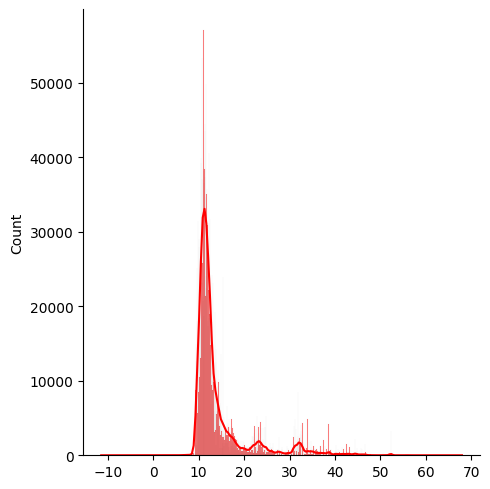

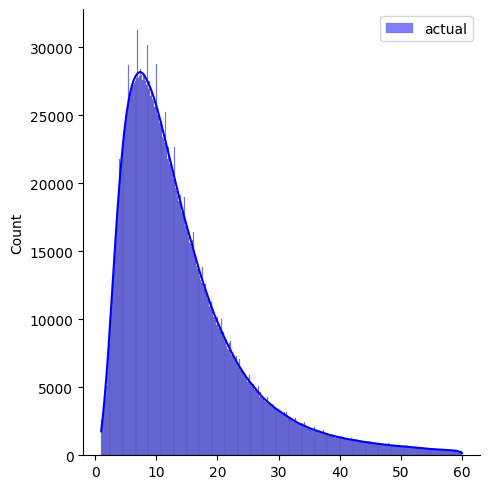

In [33]:
sns.displot(y_pred, label='predicted', color='red', kde=True)
sns.displot(y_train, label='actual', color='blue', kde=True)
plt.legend()

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

In [42]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"RMSE: {rmse:.8f}")

RMSE: 7.65839618


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
print("Начинаю подсчет уникальных ключей... Это может занять время и потребить память.")
all_keys = set()
try:
    for i, d in enumerate(train_dicts):
        all_keys.update(d.keys())
        if (i + 1) % 100000 == 0: # Логирование прогресса
            print(f"Обработано {i+1} словарей, текущее количество уникальных ключей: {len(all_keys)}")
    print(f"Всего уникальных ключей (потенциальных признаков): {len(all_keys)}")
except MemoryError:
    print("Ошибка памяти даже при подсчете уникальных ключей!")
    print(f"На момент ошибки было обработано примерно {i} словарей и найдено {len(all_keys)} уникальных ключей.")
    print("Это указывает на ОЧЕНЬ большое количество уникальных ключей или очень длинные имена ключей.")
except Exception as e:
    print(f"Произошла другая ошибка при подсчете ключей: {e}")

# Также полезно знать среднее количество ключей на словарь
if train_dicts and len(train_dicts) > 0:
    # Возьмем небольшую выборку для оценки среднего, чтобы не итерировать все 3 млн еще раз
    sample_for_avg_keys = train_dicts[:10000] if len(train_dicts) > 10000 else train_dicts
    avg_keys = sum(len(d) for d in sample_for_avg_keys) / len(sample_for_avg_keys)
    print(f"Среднее количество ключей в словаре (на выборке из {len(sample_for_avg_keys)}): {avg_keys:.2f}")
    print(f"Пример первого словаря: {train_dicts[0] if train_dicts else 'Нет данных'}")

In [ ]:
unique_pu_locations = set()
unique_do_locations = set()
has_trip_distance_key = False # Просто для полноты картины

print("Анализирую уникальные значения для PULocationID и DOLocationID...")
for i, d in enumerate(train_dicts):
    if 'PULocationID' in d and isinstance(d['PULocationID'], str):
        unique_pu_locations.add(d['PULocationID'])
    if 'DOLocationID' in d and isinstance(d['DOLocationID'], str):
        unique_do_locations.add(d['DOLocationID'])
    if 'trip_distance' in d:
        has_trip_distance_key = True

    if (i + 1) % 300000 == 0:
         print(f"Обработано {i+1} словарей. "
               f"Уникальных PULocationID: {len(unique_pu_locations)}, "
               f"Уникальных DOLocationID: {len(unique_do_locations)}")

num_pu_features = len(unique_pu_locations)
num_do_features = len(unique_do_locations)
num_trip_features = 1 if has_trip_distance_key else 0 # если ключ trip_distance вообще есть
total_generated_features = num_pu_features + num_do_features + num_trip_features

print(f"\nКоличество уникальных строковых значений для PULocationID: {num_pu_features}")
print(f"Количество уникальных строковых значений для DOLocationID: {num_do_features}")
print(f"Признак trip_distance будет создан: {has_trip_distance_key}")
print(f"Предполагаемое общее количество признаков (столбцов): {total_generated_features}")

if total_generated_features > 50000: # Порог, после которого стоит беспокоиться
    print("ПРЕДУПРЕЖДЕНИЕ: Количество генерируемых признаков очень велико! Это может быть причиной нехватки памяти.")

In [ ]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np

dv = DictVectorizer(sparse=True, dtype=np.float32)
# X_train = dv.fit_transform(train_dicts) # Попробуйте это

In [ ]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import sys
import pyarrow.parquet as pq
import pyarrow as pa
import requests
import os
import gc

# ... (версии и download_file остаются такими же) ...
parquet_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
LOCAL_PARQUET_FILENAME = "downloaded_tripdata.parquet"
COLUMNS_TO_PROCESS = ['PULocationID', 'DOLocationID', 'trip_distance']

def download_file(url, local_filename):
    print(f"Скачиваю файл с {url} в {local_filename}...")
    try:
        with requests.get(url, stream=True) as r:
            r.raise_for_status()
            with open(local_filename, 'wb') as f:
                for chunk_http in r.iter_content(chunk_size=8192):
                    f.write(chunk_http)
        print(f"Файл успешно скачан и сохранен как {local_filename}")
        return True
    except Exception as e:
        print(f"Ошибка при скачивании файла: {e}")
        return False

def generate_dictionaries_from_parquet_batches(local_filepath, columns, batch_size=100000): # Добавляем batch_size
    """
    Генератор, который читает локальный Parquet файл батчами строк
    и выдает словари для DictVectorizer.
    """
    print(f"Начинаю итеративное чтение локального Parquet файла по батчам: {local_filepath}")
    processed_rows_total = 0
    try:
        if not os.path.exists(local_filepath):
            print(f"Файл {local_filepath} не найден.")
            return

        parquet_file = pq.ParquetFile(local_filepath)
        print(f"Файл метаданные: {parquet_file.metadata}")
        print(f"Схема файла: {parquet_file.schema}")

        # Используем iter_batches для чтения порциями строк
        # batch_size - количество строк в каждом RecordBatch
        for i, record_batch in enumerate(parquet_file.iter_batches(batch_size=batch_size, columns=columns)):
            print(f"Читаю батч строк №{i+1}, размер: {record_batch.num_rows} строк")
            
            # Преобразуем Arrow RecordBatch в Pandas DataFrame
            # Это более эффективно, чем table.to_pandas(), если мы уже имеем RecordBatch
            chunk_df = record_batch.to_pandas()
            print(f"Обрабатываю DataFrame из батча, размер: {len(chunk_df)} строк")

            # ВАЖНО: PULocationID и DOLocationID должны быть строками
            chunk_df['PULocationID'] = chunk_df['PULocationID'].astype(str)
            chunk_df['DOLocationID'] = chunk_df['DOLocationID'].astype(str)
            # trip_distance должен быть числом (float)
            chunk_df['trip_distance'] = chunk_df['trip_distance'].astype(float)

            for record in chunk_df.to_dict(orient='records'):
                yield record
            processed_rows_total += len(chunk_df)
            print(f"Прогресс генератора: всего обработано {processed_rows_total} строк.")
            del chunk_df # Освобождаем память от DataFrame
            del record_batch # Освобождаем память от RecordBatch
            gc.collect() 

    except Exception as e:
        print(f"Ошибка при чтении или обработке Parquet файла: {e}")
        import traceback
        traceback.print_exc()
        raise

    print(f"Генератор завершил работу. Всего обработано {processed_rows_total} строк.")

# --- Основная часть ---
if __name__ == '__main__':
    # 1. Скачиваем файл (если еще не скачан или для чистоты эксперимента)
    if not download_file(parquet_url, LOCAL_PARQUET_FILENAME):
        print("Не удалось скачать файл. Прерываю выполнение.")
        # В Jupyter можно просто прервать, в скрипте sys.exit(1)
        # For Jupyter, we'll just stop here if download fails
        if 'get_ipython' in globals(): # Проверка, что мы в IPython/Jupyter
             print("Остановка выполнения ячейки.")
        else:
            sys.exit(1)


    # 2. Если скачивание успешно, продолжаем с обработкой
    dv = DictVectorizer(sparse=True, dtype=np.float32)

    print("Создаю генератор словарей...")
    # Используем новую функцию с batch_size
    # Можно начать с меньшего batch_size, например 50000 или 100000
    dict_generator = generate_dictionaries_from_parquet_batches(
        LOCAL_PARQUET_FILENAME, 
        COLUMNS_TO_PROCESS, 
        batch_size=50000 # Экспериментируйте с этим значением
    )

    print("\nЗапускаю dv.fit_transform() с генератором...")
    try:
        X_train = dv.fit_transform(dict_generator)
        print("\nУСПЕХ! dv.fit_transform() завершен.")
        print(f"Размерность полученной матрицы X_train: {X_train.shape}")
        # ... (остальной код для вывода информации о X_train) ...
        if hasattr(dv, 'feature_names_'):
            print(f"Количество сгенерированных признаков: {len(dv.feature_names_)}")
            # print(f"Первые 20 признаков: {dv.feature_names_[:20]}")
        if X_train.format in ['csr', 'csc']:
             mem_bytes = X_train.data.nbytes + X_train.indices.nbytes + X_train.indptr.nbytes
             print(f"Примерное потребление памяти матрицей X_train: {mem_bytes / (1024**2):.2f} MB")

    except MemoryError:
        print("\nОШИБКА ПАМЯТИ (MemoryError) во время fit_transform!")
        print("Попробуйте уменьшить batch_size в generate_dictionaries_from_parquet_batches.")
    except Exception as e:
        print(f"\nПроизошла ошибка во время dv.fit_transform(): {e}")
        import traceback
        traceback.print_exc()
    # finally: # Опциональное удаление файла
    #     if os.path.exists(LOCAL_PARQUET_FILENAME):
    #         pass # os.remove(LOCAL_PARQUET_FILENAME)

In [ ]:
X_train  = dv.fit_transform(train_dicts)

In [ ]:
print(f"Количество словарей: {len(train_dicts)}")
